In [6]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------------ --------------------- 153.6/323.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/16.2 MB 5.9 MB/s eta 0:00:03
   - -------------------------------------- 0.4/16.2 MB 5.3 MB/s eta 0:00:03
   - -------------------------------------- 0.7/16.2 MB 5.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/16.2 MB 4.9 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/16.2 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/16.2 MB 4.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/16.2 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/16.2 MB 5.1 MB/s eta 0:00:03
   ---- ----------------------------------- 2.0/16.2 MB 4.9 MB/s eta 0:00:03
   ---

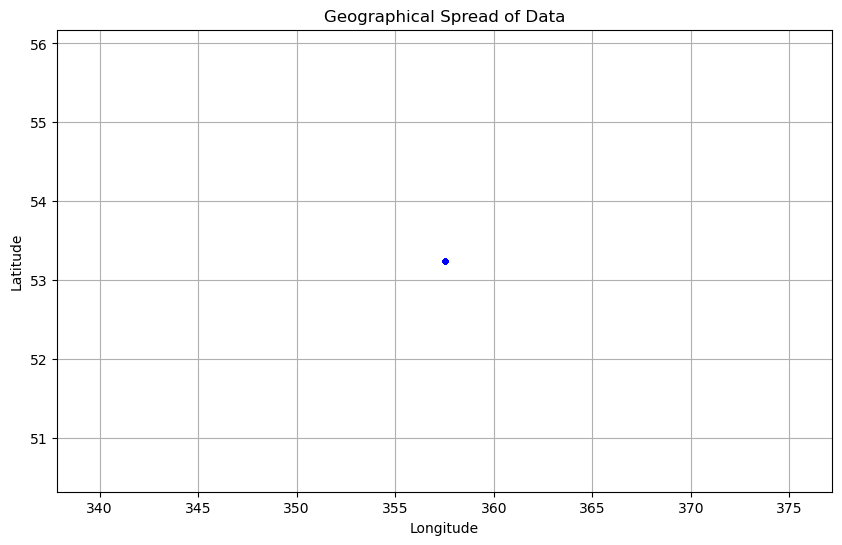

<Figure size 1200x600 with 0 Axes>

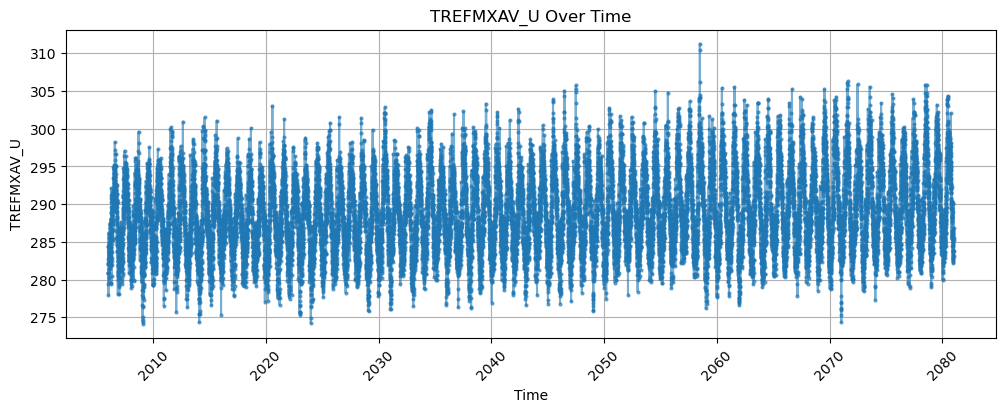

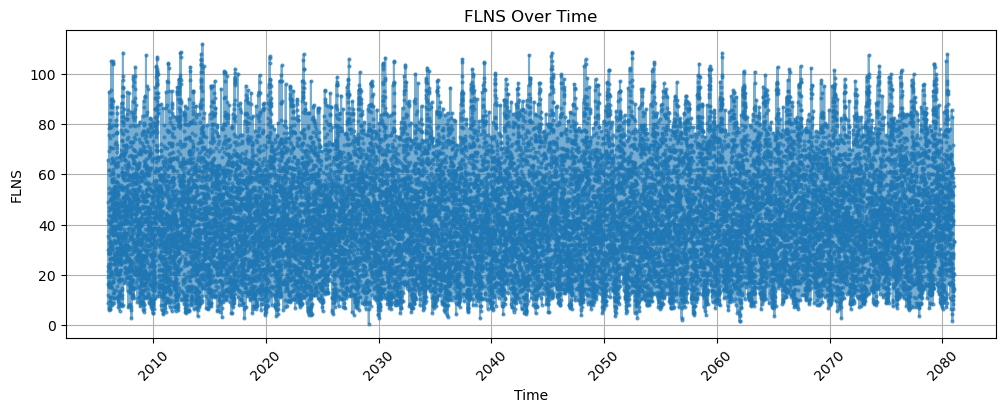

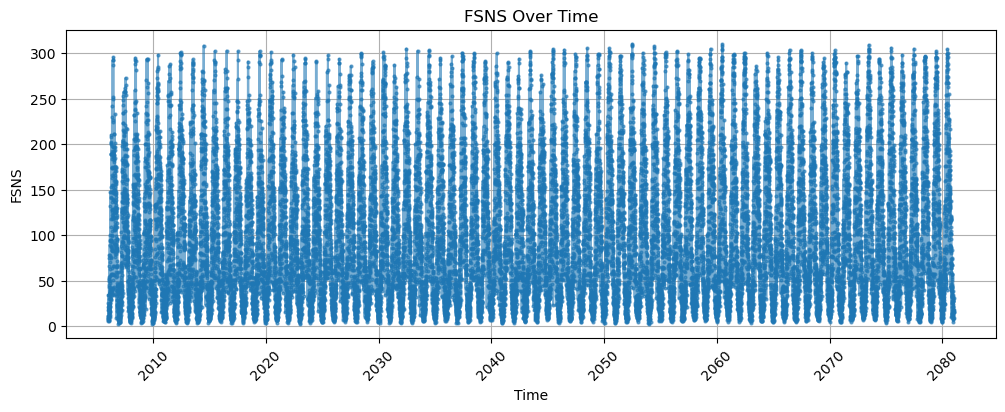

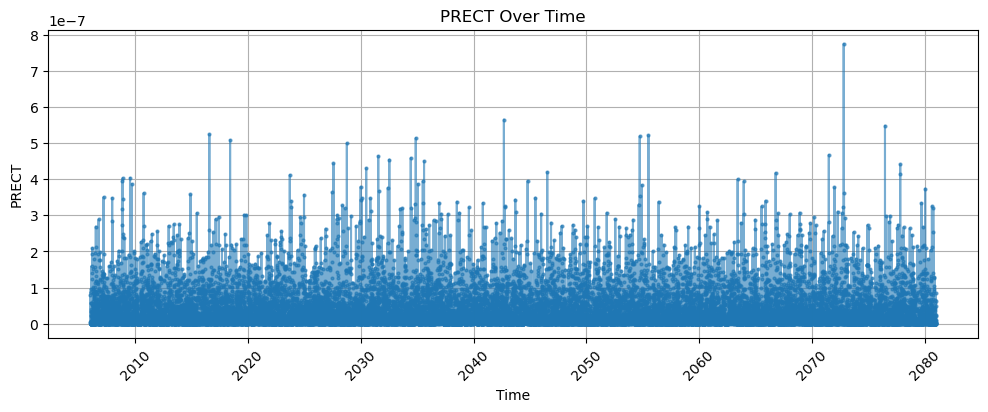

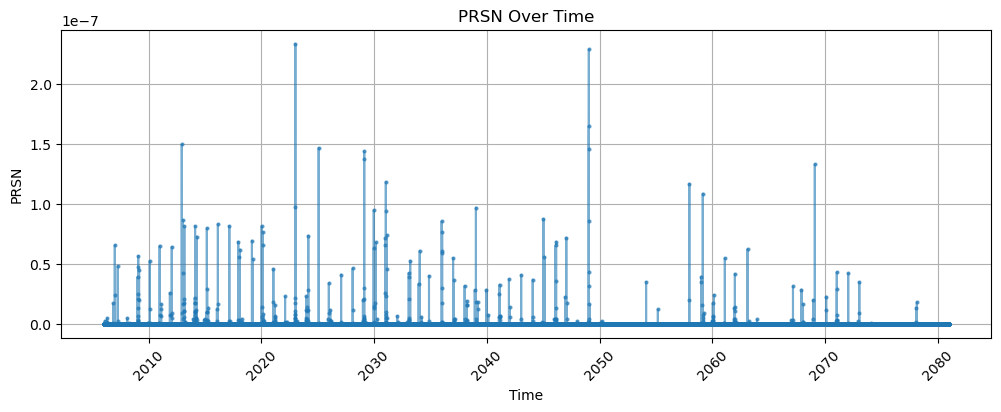

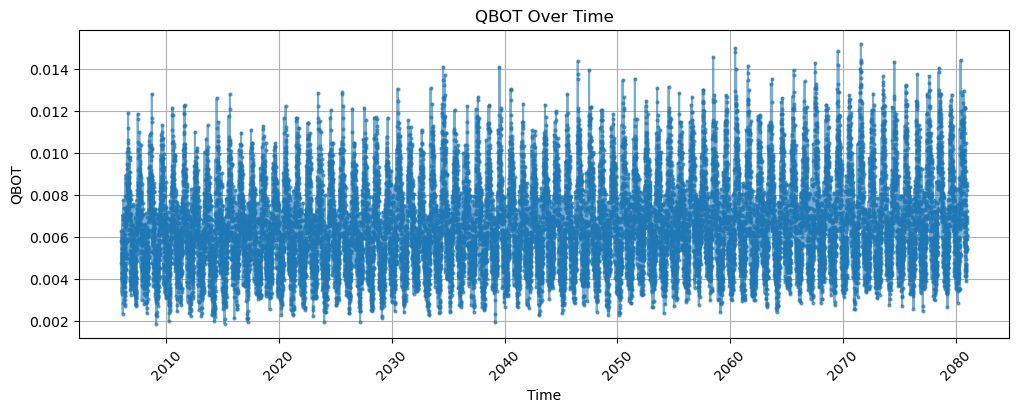

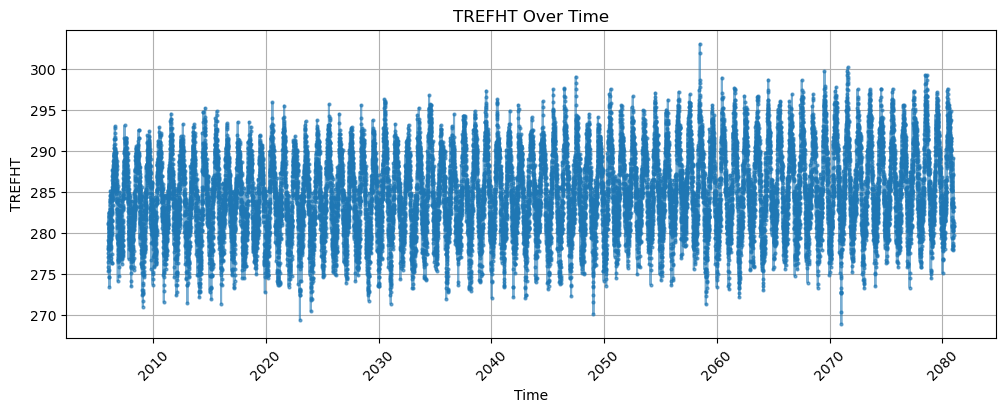

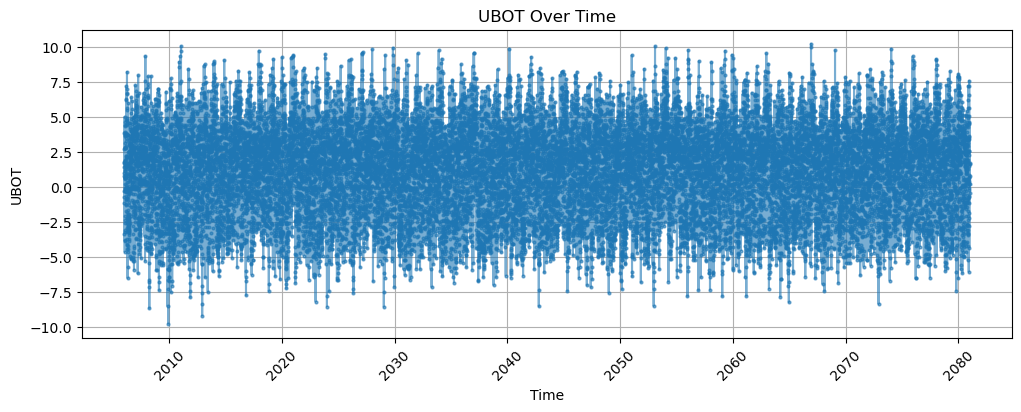

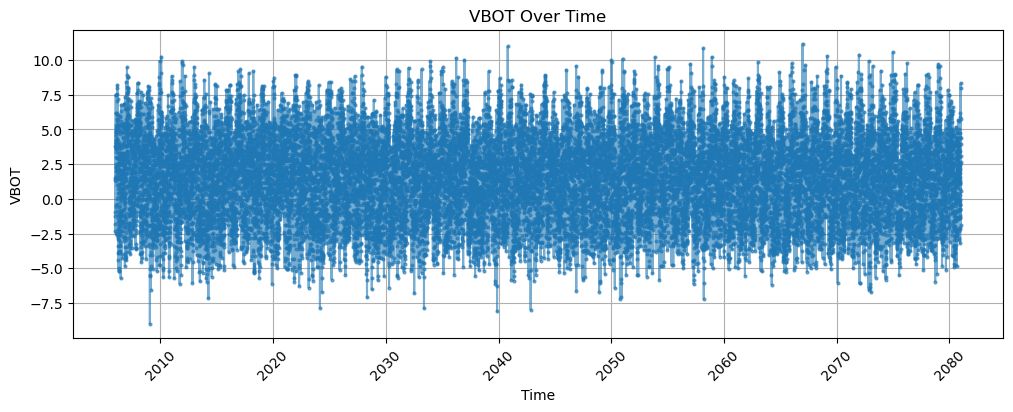

Summary Statistics:
                                time    TREFMXAV_U          FLNS  \
count                          27374  27374.000000  27374.000000   
mean   2043-07-02 19:59:07.395338240    288.836179     42.995679   
min              2006-01-02 00:00:00    274.153200      0.611385   
25%              2024-10-02 06:00:00    284.719465     26.157544   
50%              2043-07-02 12:00:00    288.299895     40.777005   
75%              2062-04-01 18:00:00    292.869525     57.113572   
max              2080-12-31 00:00:00    311.257260    111.851400   
std                              NaN      5.246468     21.451927   

               FSNS         PRECT          PRSN          QBOT        TREFHT  \
count  27374.000000  2.737400e+04  2.737400e+04  27374.000000  27374.000000   
mean      97.026261  3.379697e-08  3.049825e-10      0.006523    284.876413   
min        2.819259 -4.671764e-28 -6.256338e-21      0.001855    268.938400   
25%       31.037187  2.131118e-09  0.000000e+00    

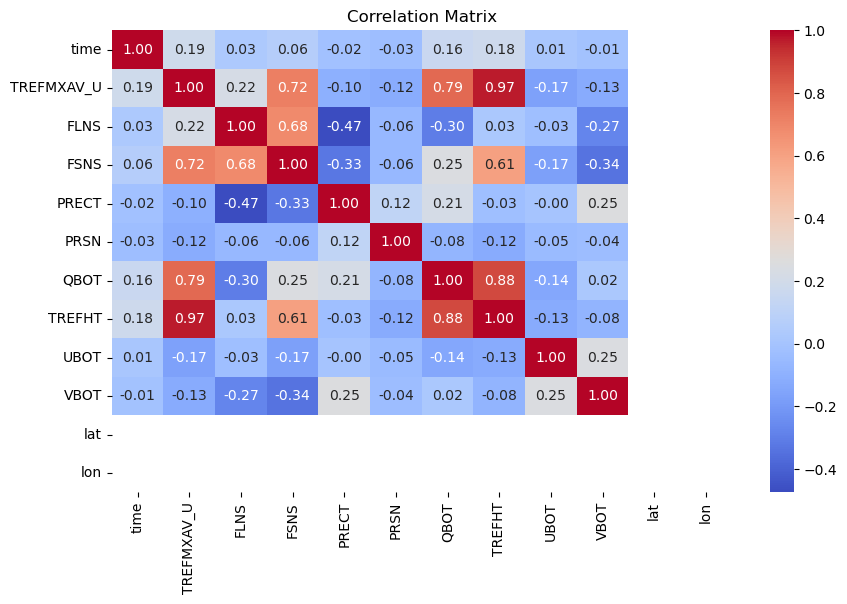

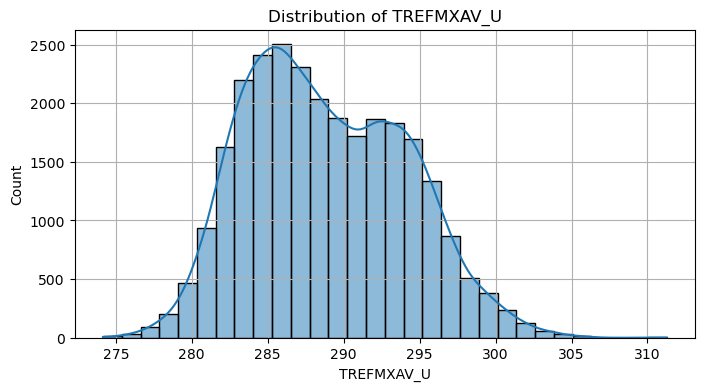

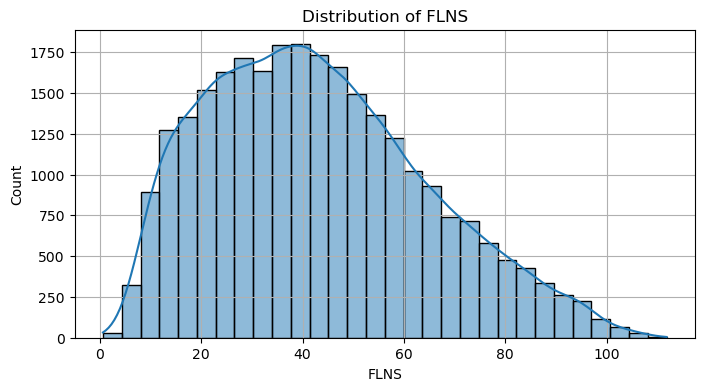

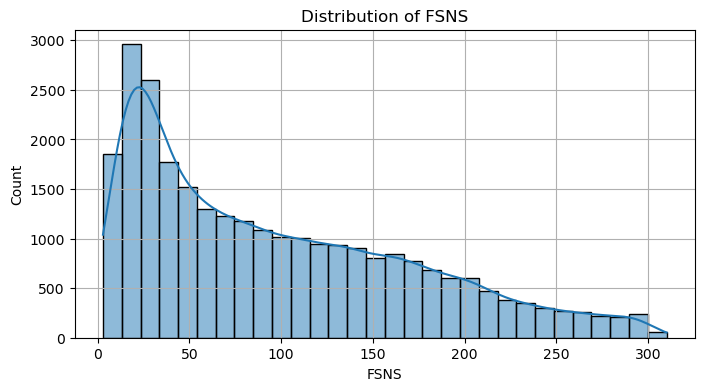

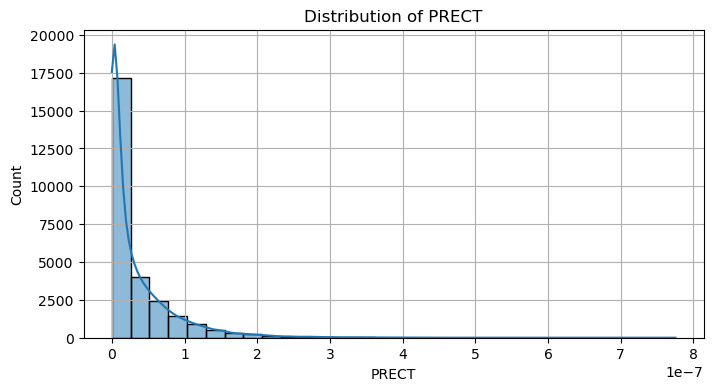

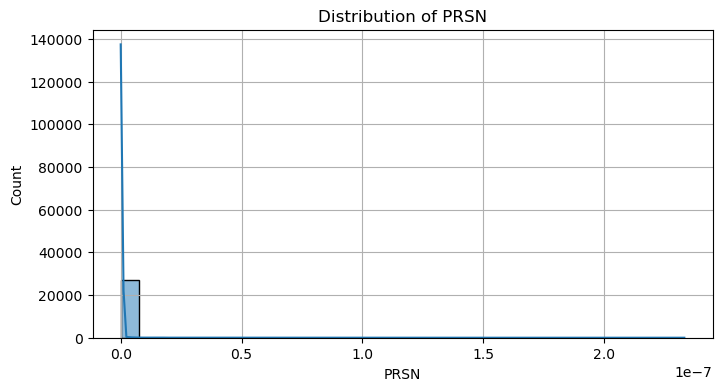

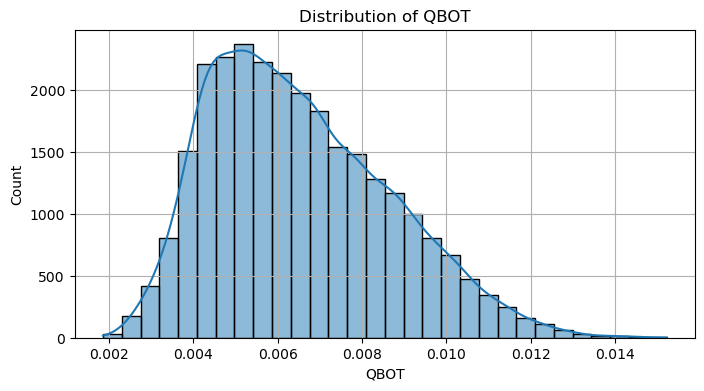

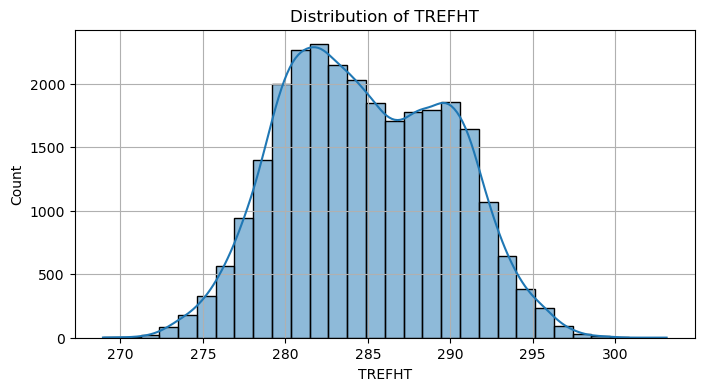

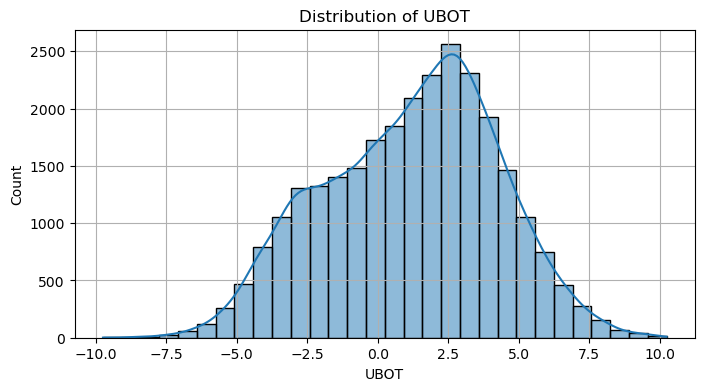

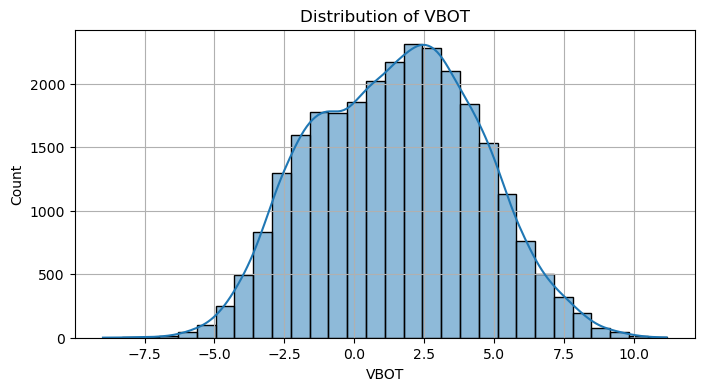

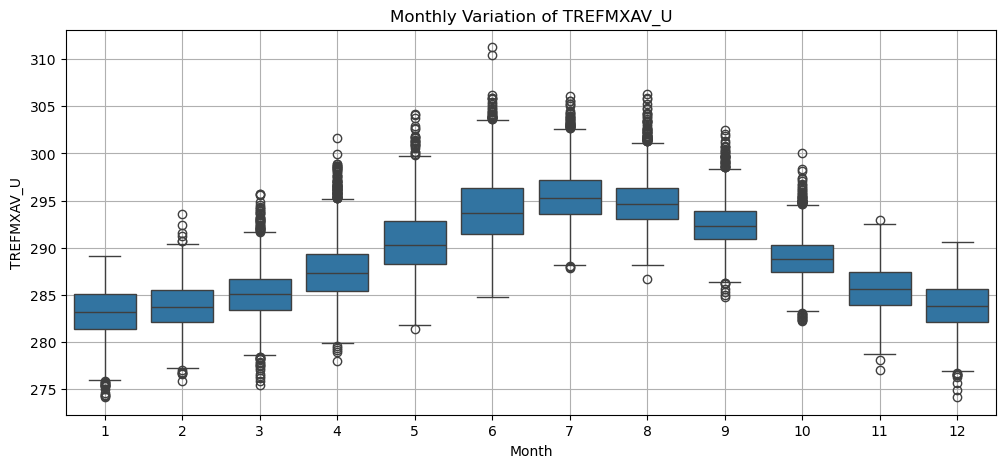

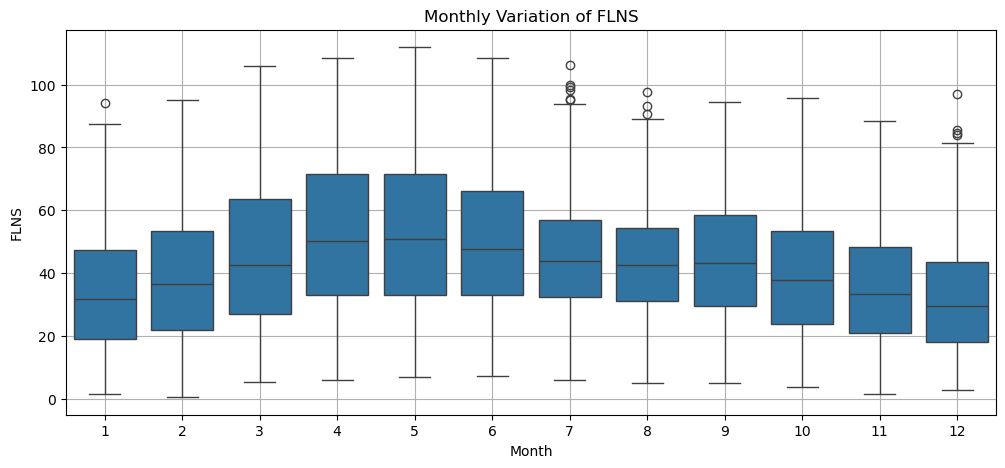

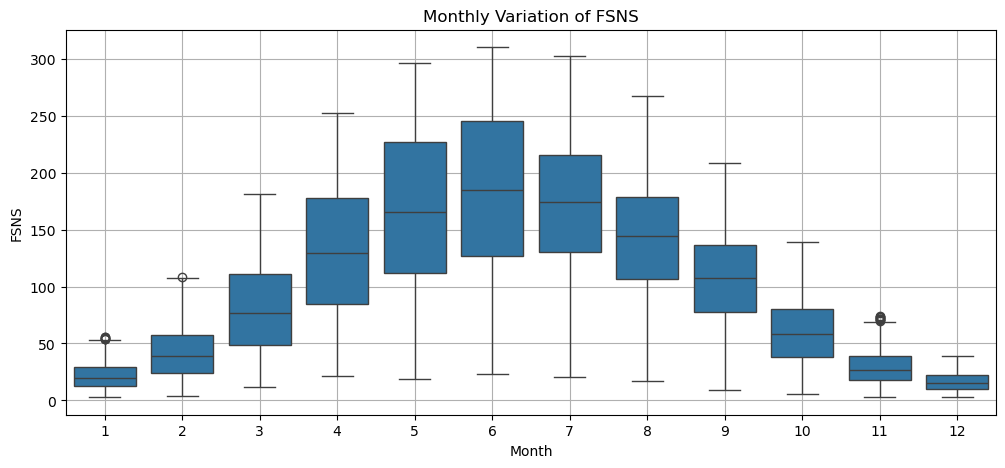

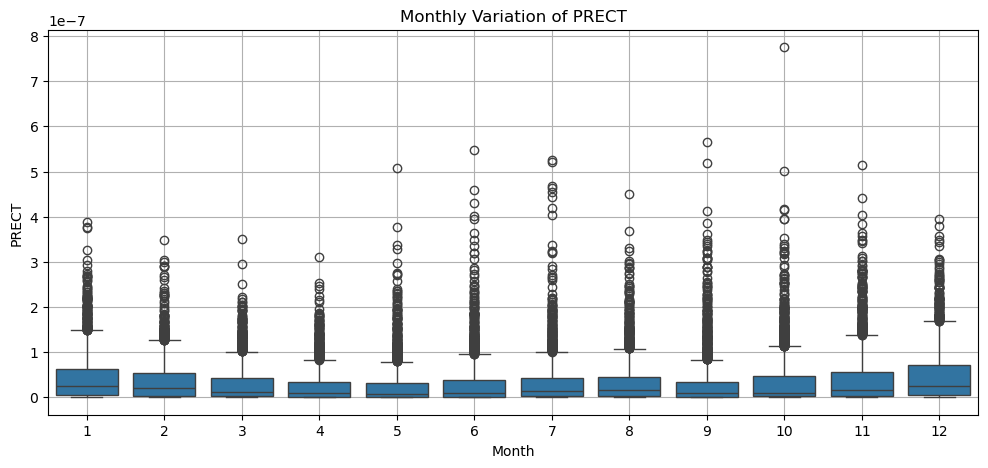

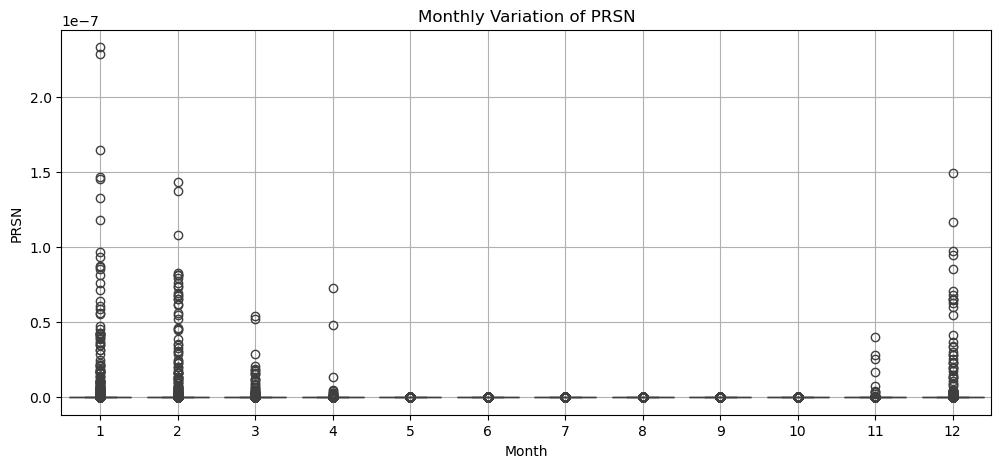

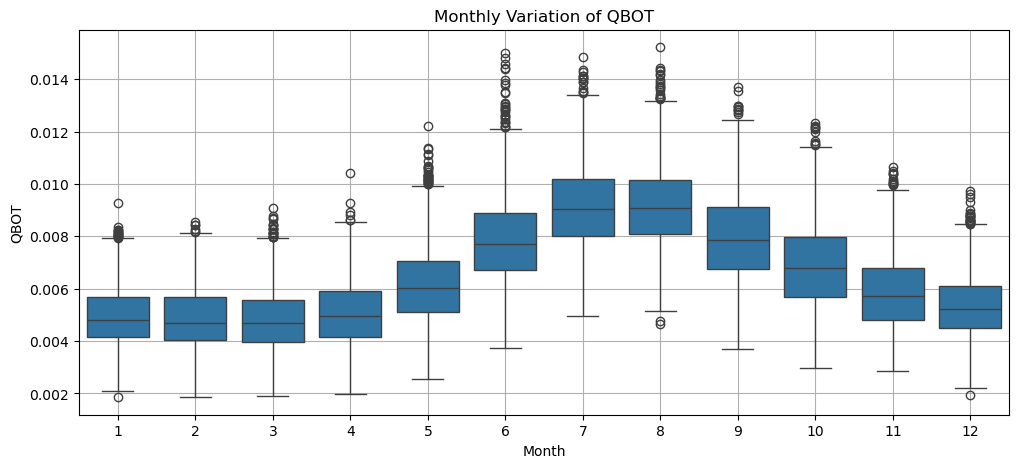

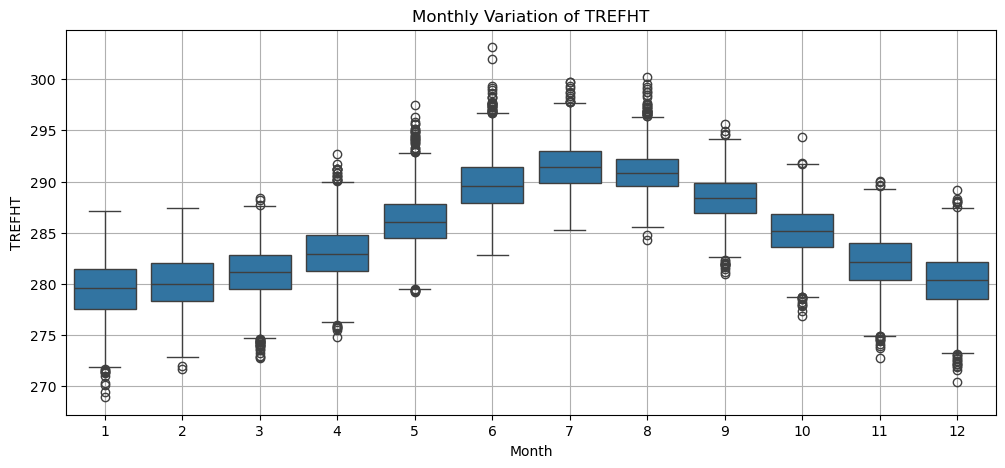

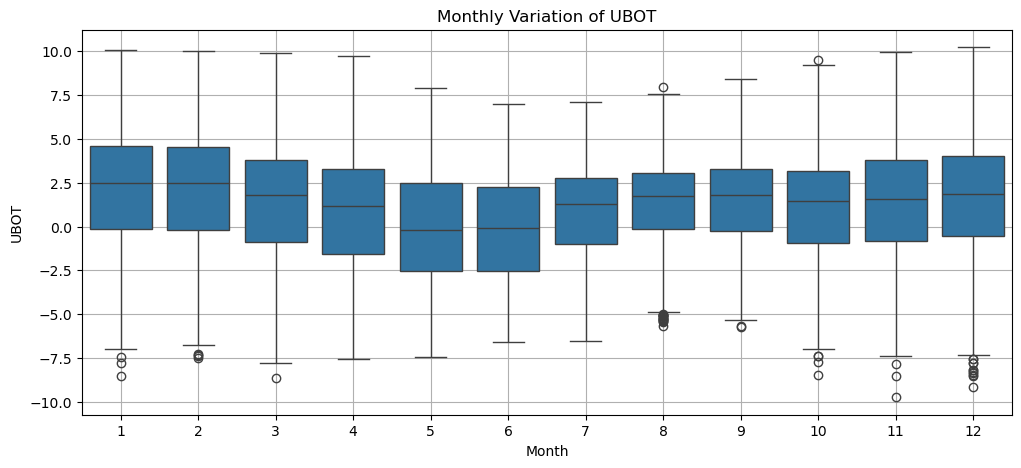

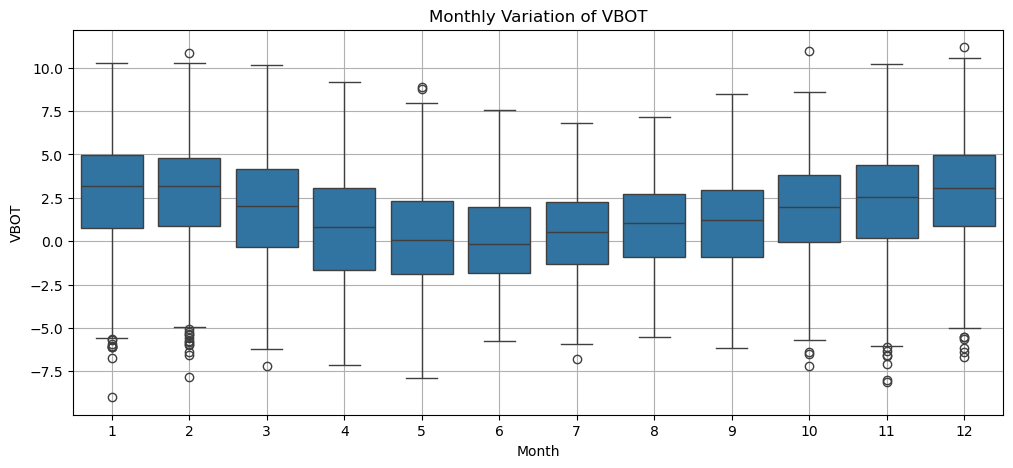

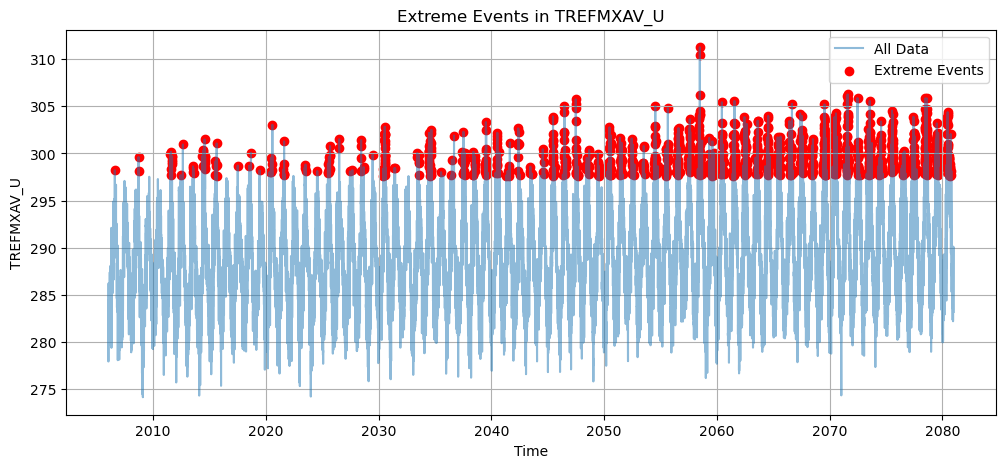

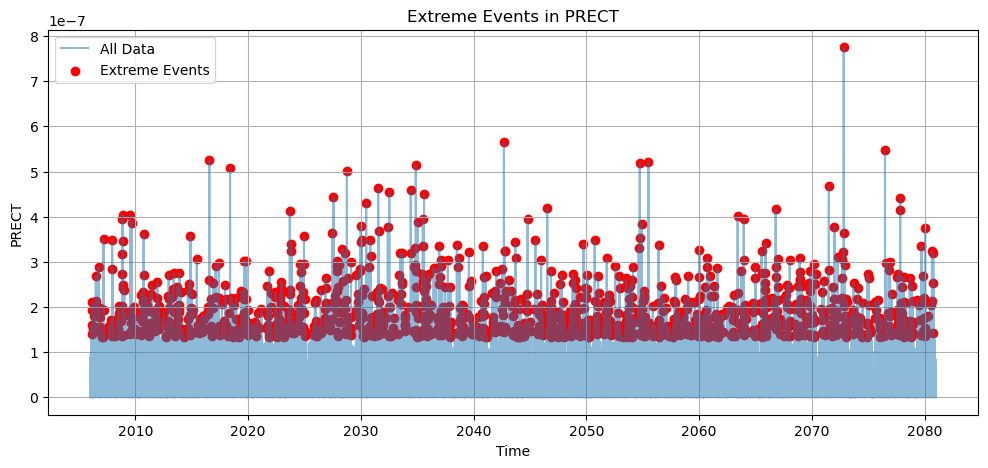

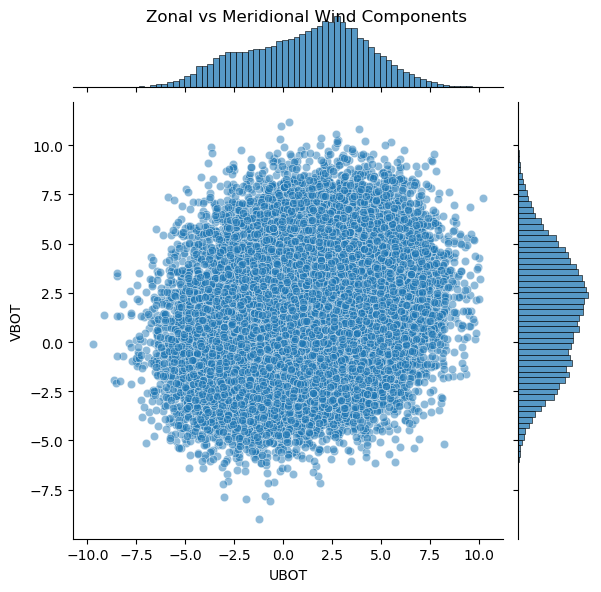

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Load the dataset
file_path = "project_1.csv"
df = pd.read_csv(file_path)

# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

# Plot geographical spread
plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], alpha=0.5, s=10, color='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Spread of Data")
plt.grid(True)
plt.show()

# Plot all other variables over time
variables = df.columns[1:-2]  # Exclude time, lat, and lon

plt.figure(figsize=(12, 6))
for var in variables:
    plt.figure(figsize=(12, 4))
    plt.plot(df['time'], df[var], marker='o', linestyle='-', markersize=2, alpha=0.6)
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.title(f"{var} Over Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Statistical Summary & Missing Values
print("Summary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Distribution Analysis
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.xlabel(var)
    plt.title(f"Distribution of {var}")
    plt.grid(True)
    plt.show()

# Seasonal Trends
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
for var in variables:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='month', y=var, data=df)
    plt.xlabel("Month")
    plt.ylabel(var)
    plt.title(f"Monthly Variation of {var}")
    plt.grid(True)
    plt.show()

# Extreme Weather Events Analysis
for var in ['TREFMXAV_U', 'PRECT']:
    threshold = df[var].quantile(0.95)
    extreme_events = df[df[var] > threshold]
    plt.figure(figsize=(12, 5))
    plt.plot(df['time'], df[var], label='All Data', alpha=0.5)
    plt.scatter(extreme_events['time'], extreme_events[var], color='red', label='Extreme Events')
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.title(f"Extreme Events in {var}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Wind Analysis (UBOT & VBOT)
sns.jointplot(x='UBOT', y='VBOT', data=df, kind='scatter', alpha=0.5)
plt.suptitle("Zonal vs Meridional Wind Components")
plt.show()

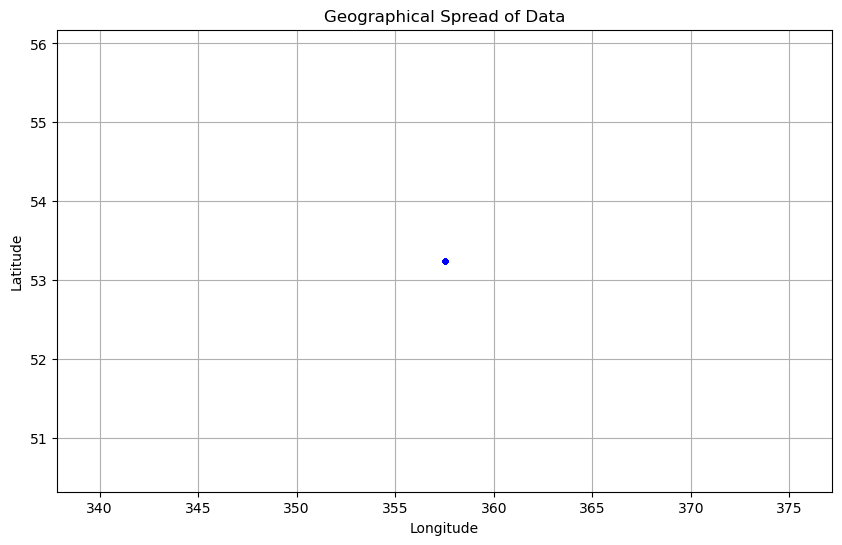

<Figure size 1200x600 with 0 Axes>

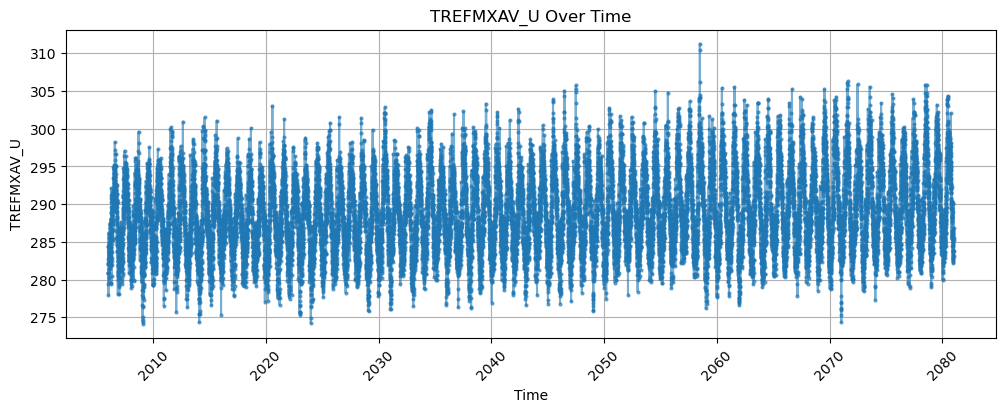

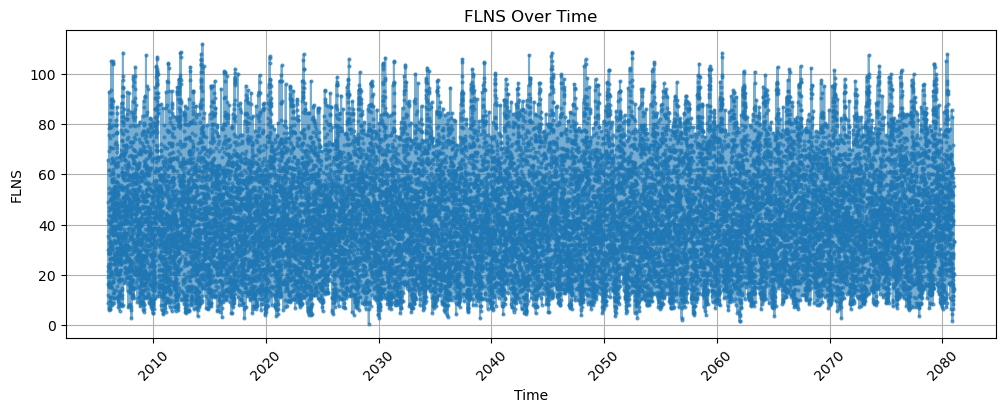

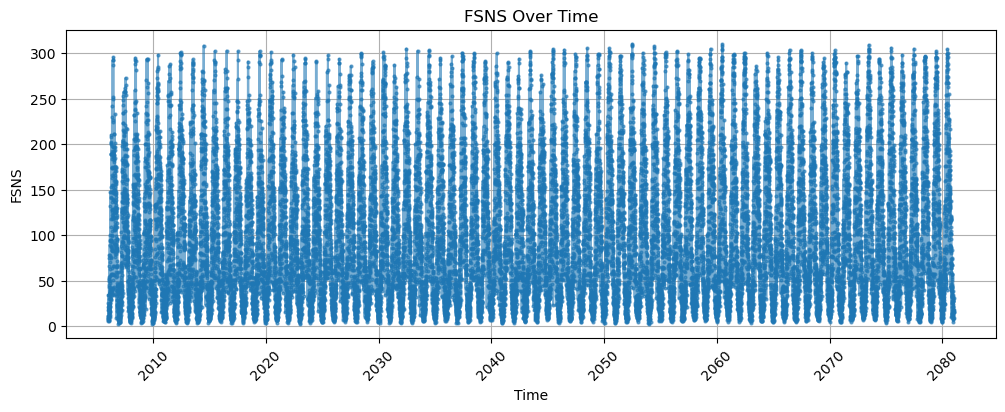

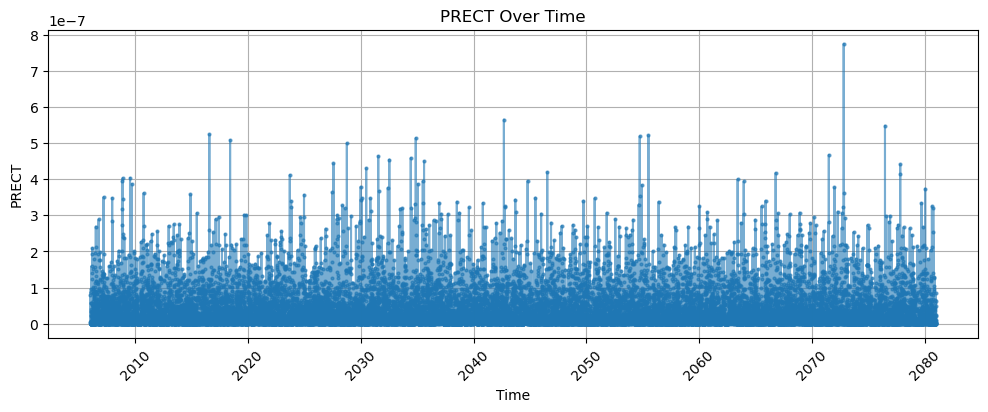

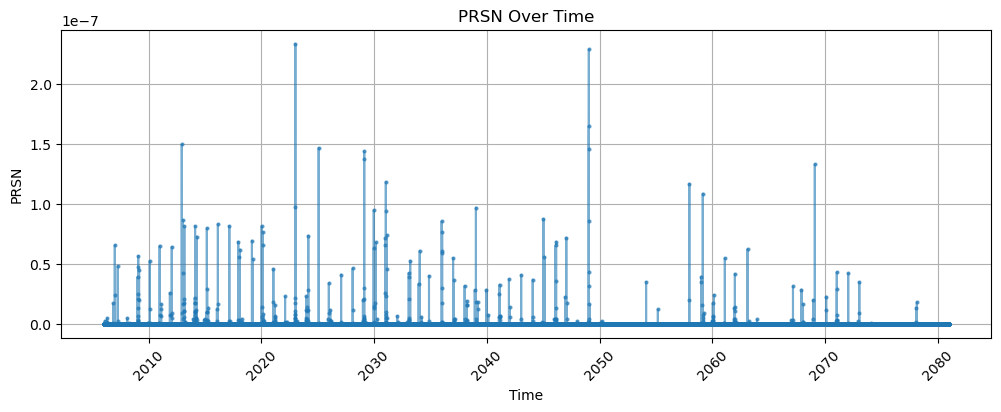

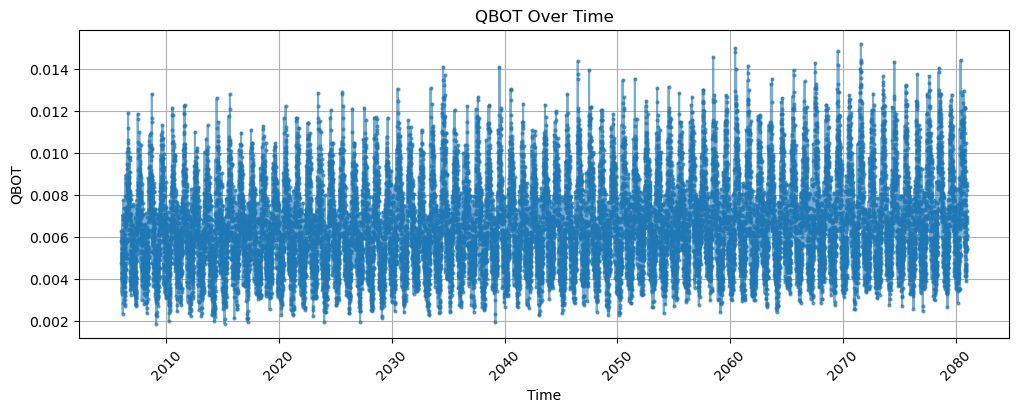

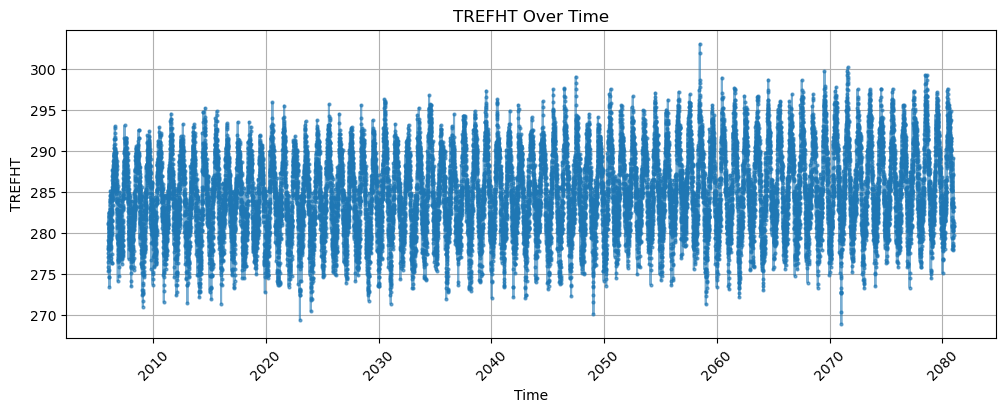

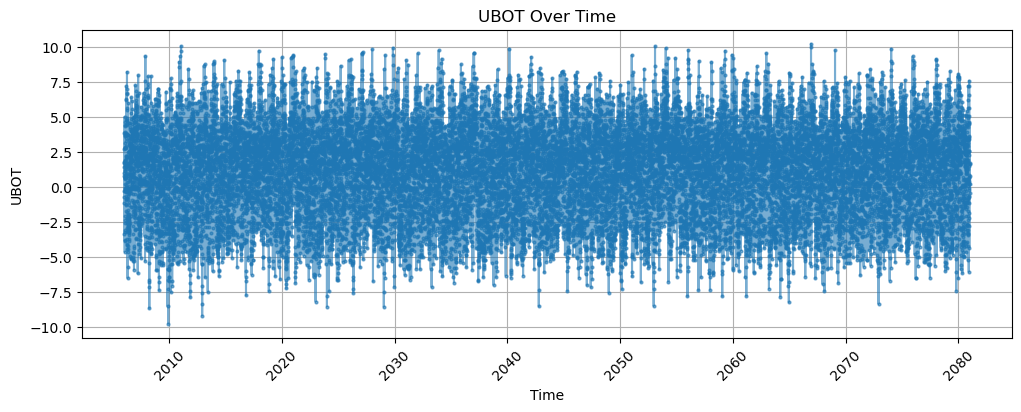

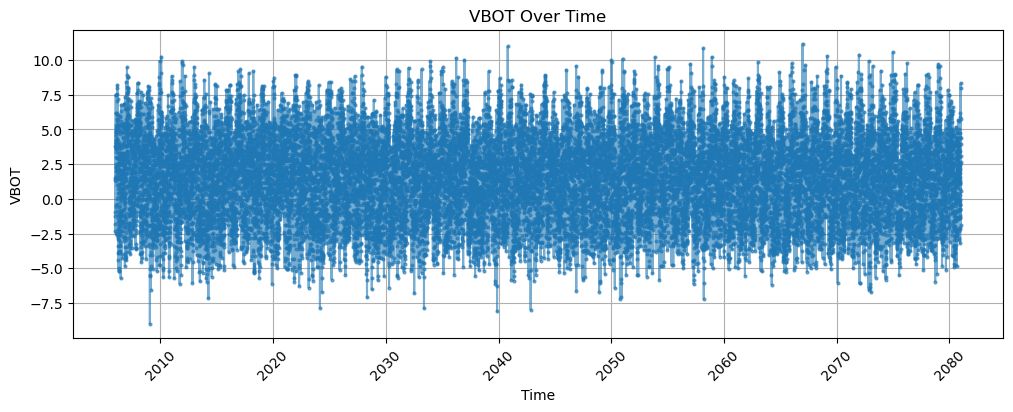

Summary Statistics:
                                time    TREFMXAV_U          FLNS  \
count                          27374  27374.000000  27374.000000   
mean   2043-07-02 19:59:07.395338240    288.836179     42.995679   
min              2006-01-02 00:00:00    274.153200      0.611385   
25%              2024-10-02 06:00:00    284.719465     26.157544   
50%              2043-07-02 12:00:00    288.299895     40.777005   
75%              2062-04-01 18:00:00    292.869525     57.113572   
max              2080-12-31 00:00:00    311.257260    111.851400   
std                              NaN      5.246468     21.451927   

               FSNS         PRECT          PRSN          QBOT        TREFHT  \
count  27374.000000  2.737400e+04  2.737400e+04  27374.000000  27374.000000   
mean      97.026261  3.379697e-08  3.049825e-10      0.006523    284.876413   
min        2.819259 -4.671764e-28 -6.256338e-21      0.001855    268.938400   
25%       31.037187  2.131118e-09  0.000000e+00    

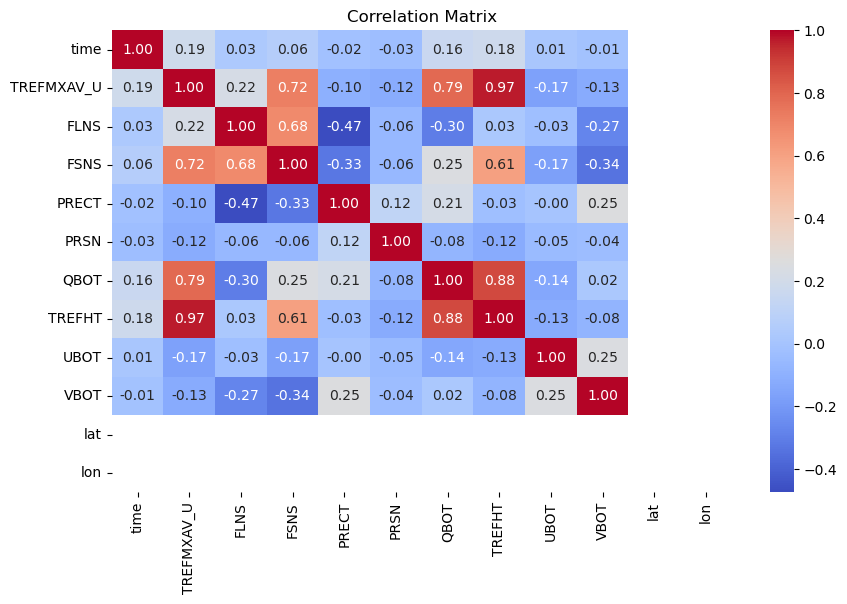

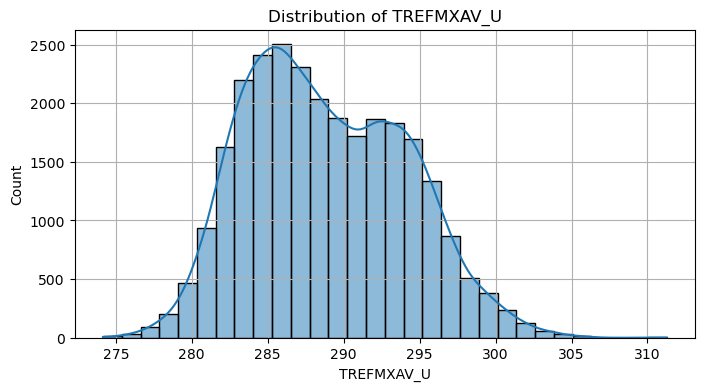

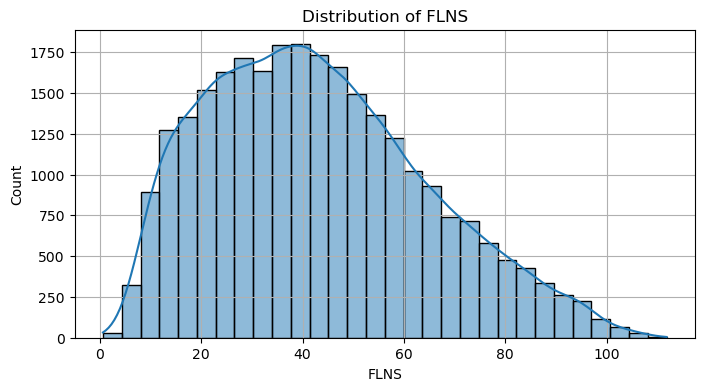

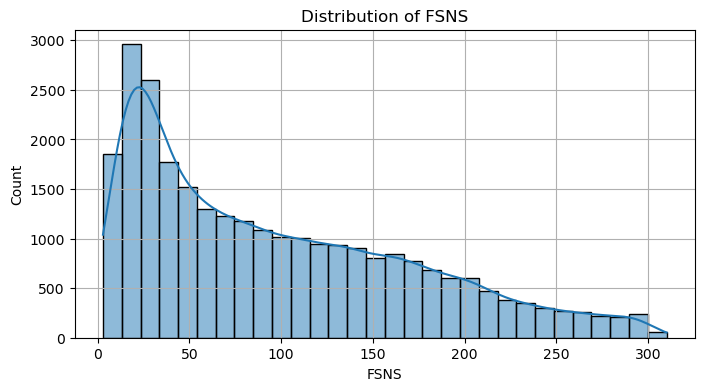

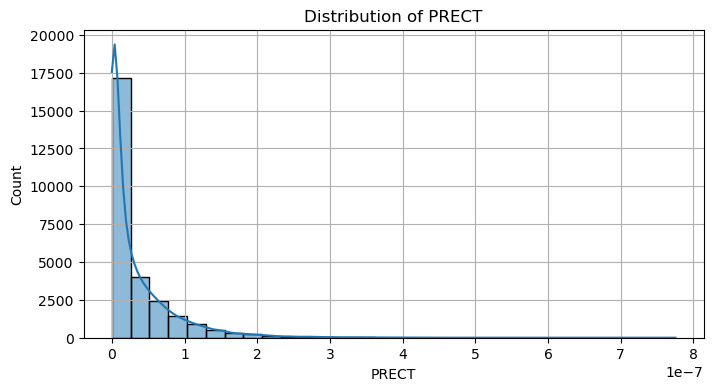

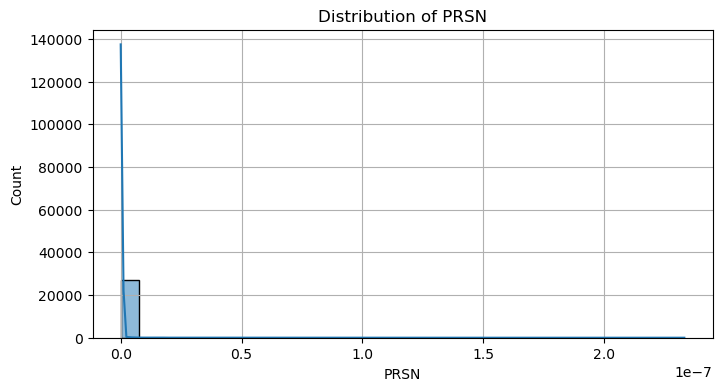

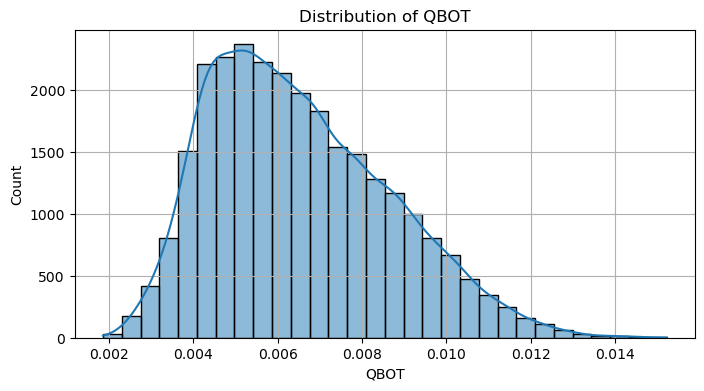

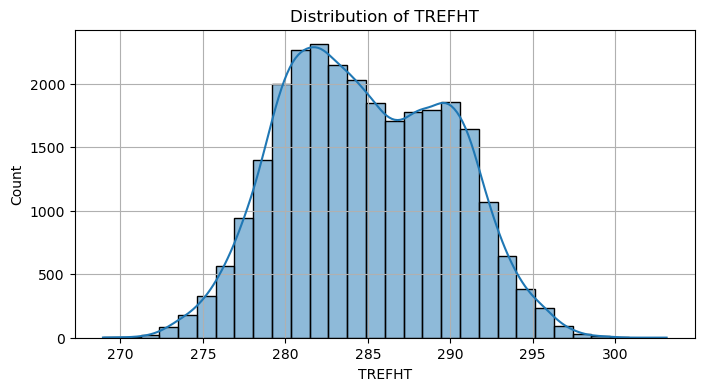

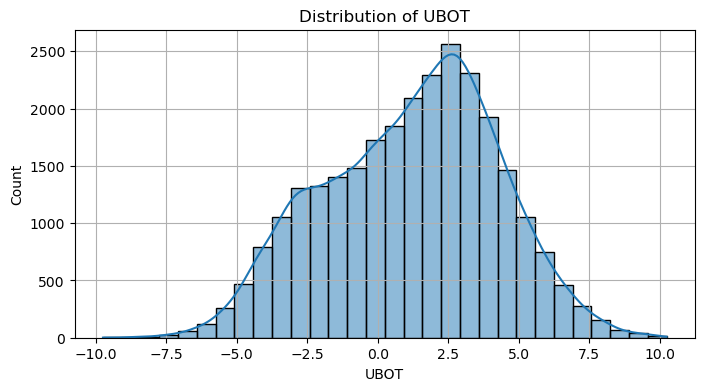

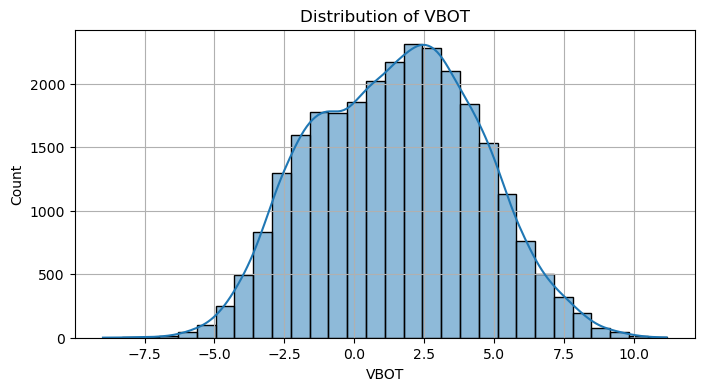

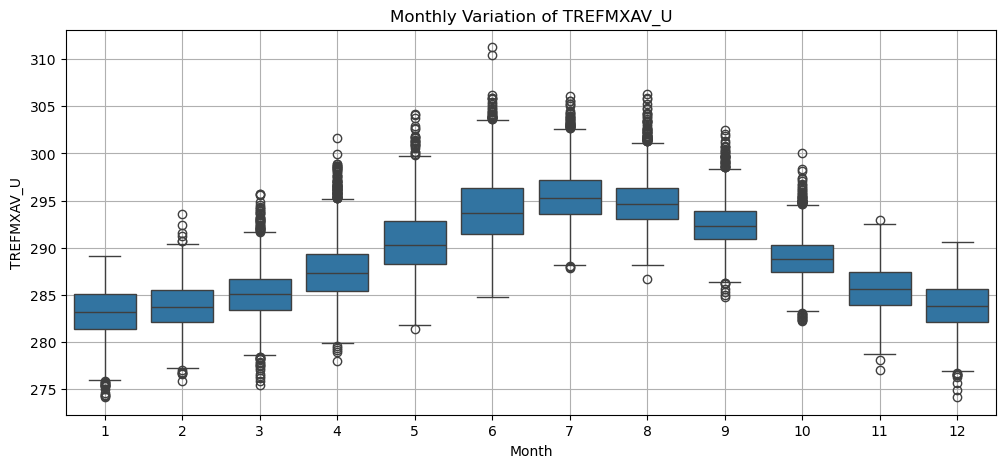

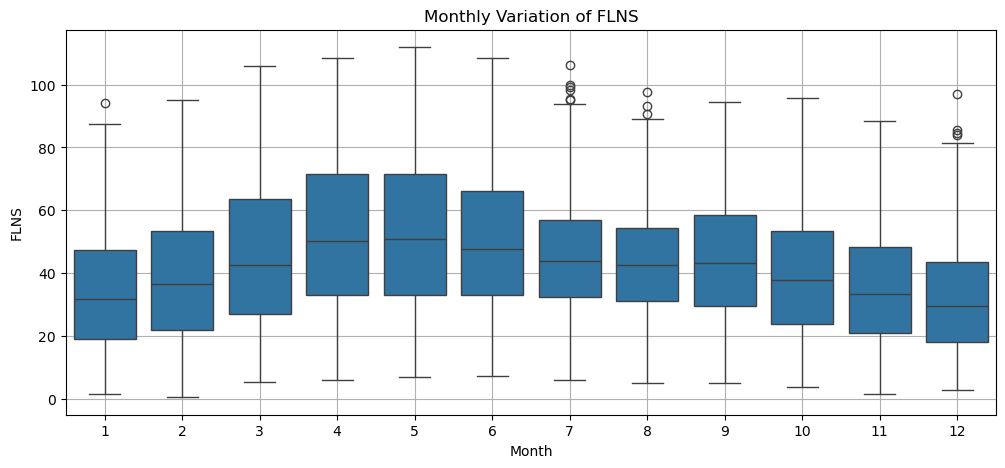

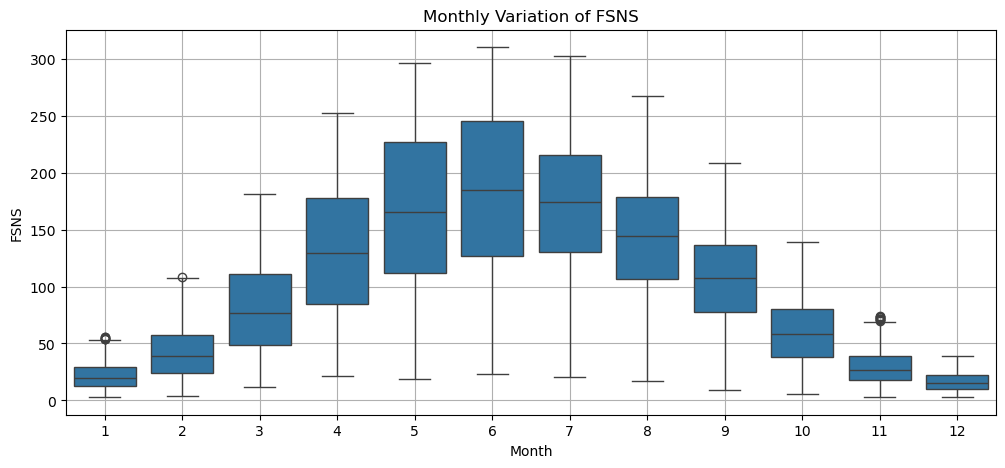

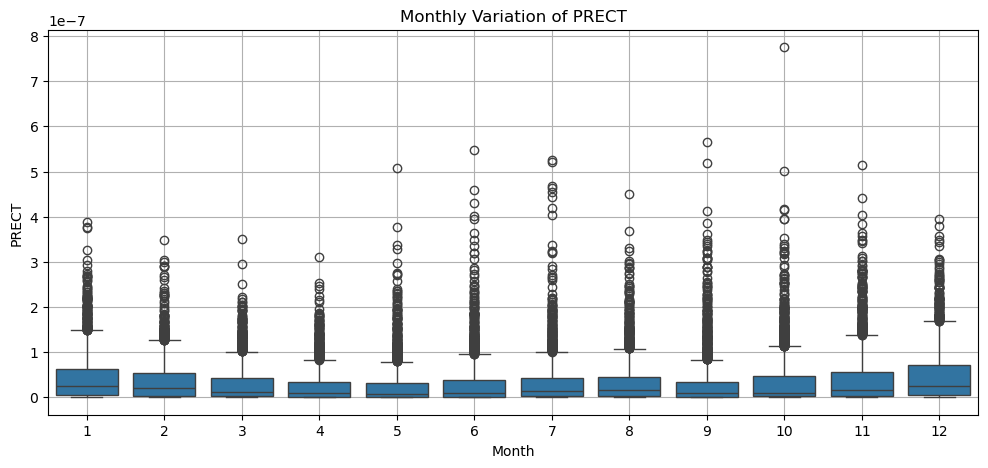

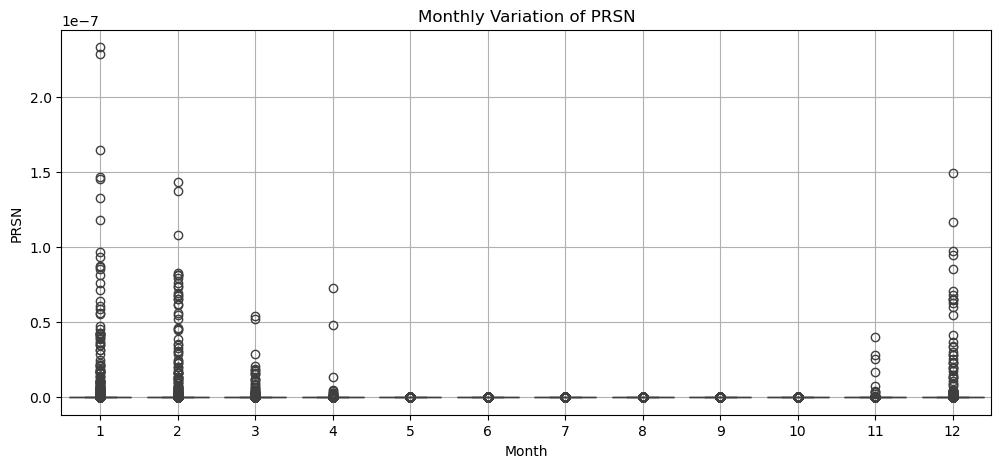

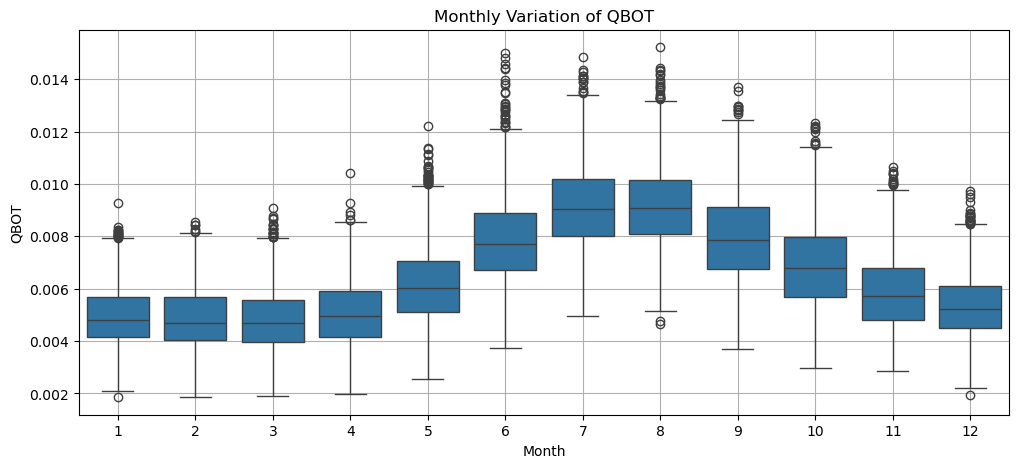

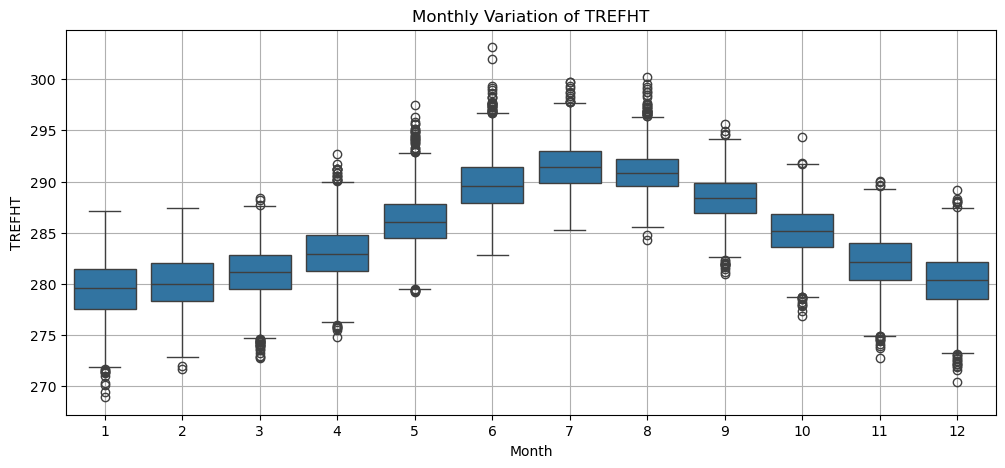

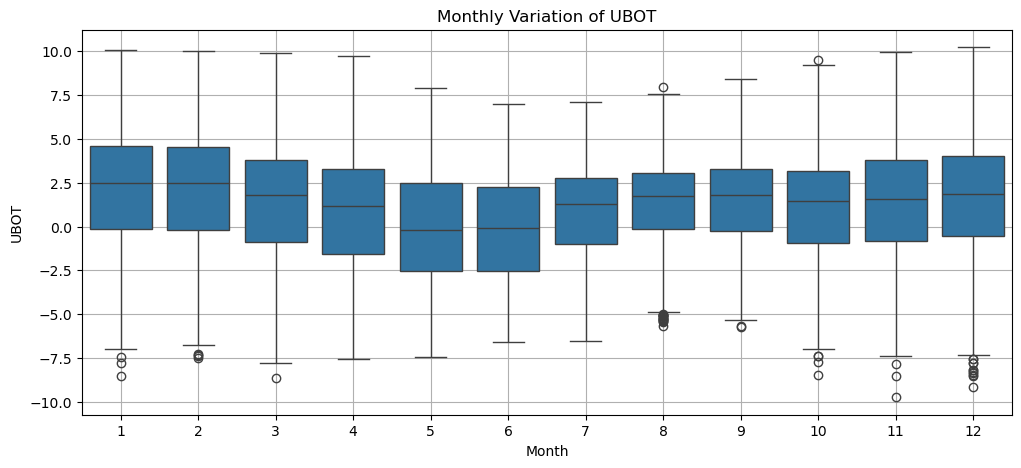

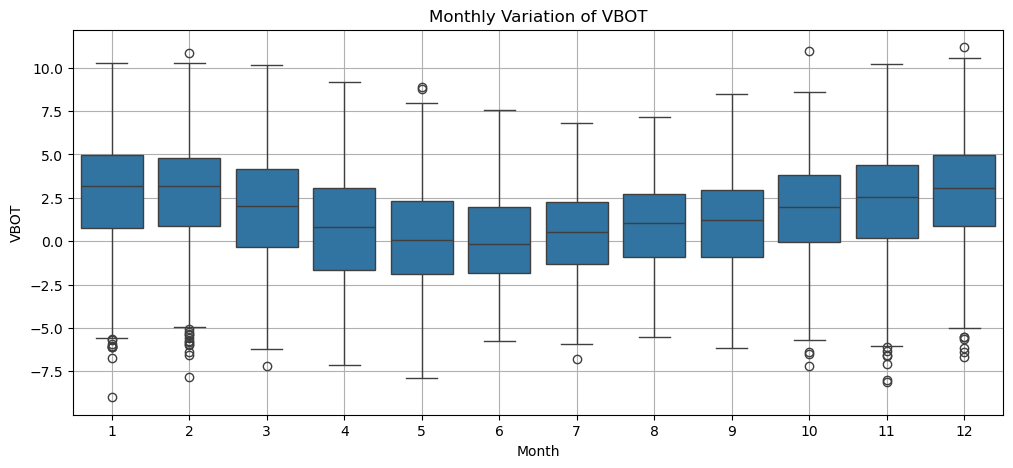

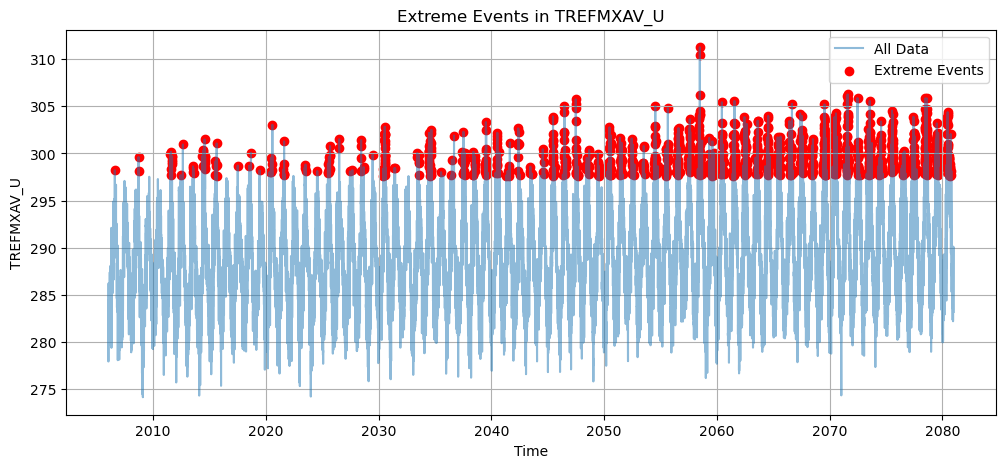

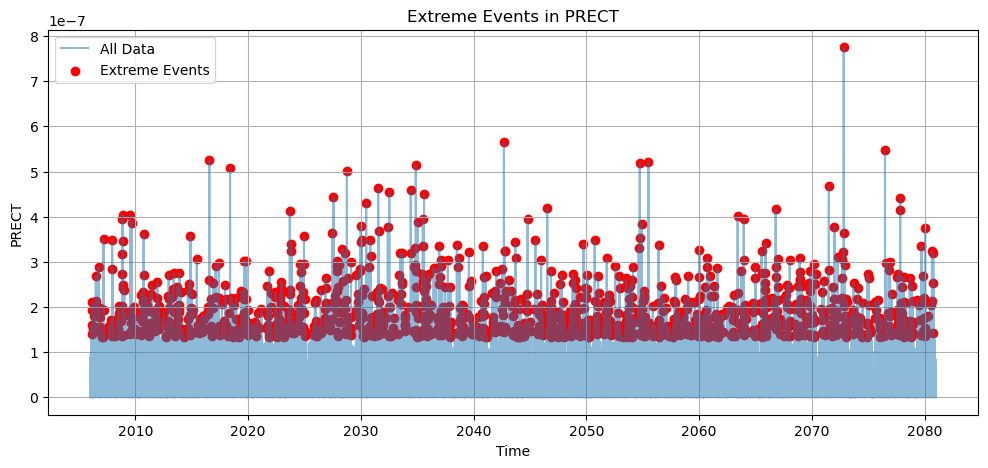

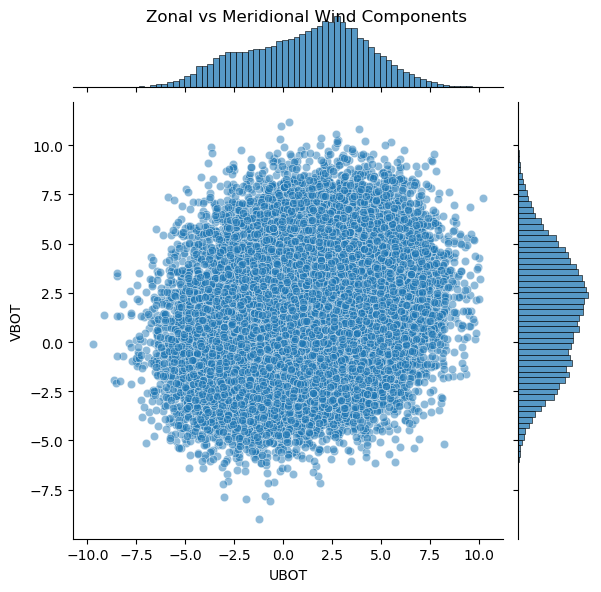

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Load the dataset
file_path = "project_1.csv"
df = pd.read_csv(file_path)

# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

# Plot geographical spread
plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], alpha=0.5, s=10, color='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Spread of Data")
plt.grid(True)
plt.savefig("geographical_spread.png")
plt.show()

# Plot all other variables over time
variables = df.columns[1:-2]  # Exclude time, lat, and lon

plt.figure(figsize=(12, 6))
for var in variables:
    plt.figure(figsize=(12, 4))
    plt.plot(df['time'], df[var], marker='o', linestyle='-', markersize=2, alpha=0.6)
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.title(f"{var} Over Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.savefig(f"{var}_over_time.png")
    plt.show()

# Statistical Summary & Missing Values
print("Summary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

# Distribution Analysis
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.xlabel(var)
    plt.title(f"Distribution of {var}")
    plt.grid(True)
    plt.savefig(f"{var}_distribution.png")
    plt.show()

# Seasonal Trends
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
for var in variables:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='month', y=var, data=df)
    plt.xlabel("Month")
    plt.ylabel(var)
    plt.title(f"Monthly Variation of {var}")
    plt.grid(True)
    plt.savefig(f"{var}_monthly_variation.png")
    plt.show()

# Extreme Weather Events Analysis
for var in ['TREFMXAV_U', 'PRECT']:
    threshold = df[var].quantile(0.95)
    extreme_events = df[df[var] > threshold]
    plt.figure(figsize=(12, 5))
    plt.plot(df['time'], df[var], label='All Data', alpha=0.5)
    plt.scatter(extreme_events['time'], extreme_events[var], color='red', label='Extreme Events')
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.title(f"Extreme Events in {var}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{var}_extreme_events.png")
    plt.show()

# Wind Analysis (UBOT & VBOT)
g = sns.jointplot(x='UBOT', y='VBOT', data=df, kind='scatter', alpha=0.5)
g.fig.suptitle("Zonal vs Meridional Wind Components")
g.savefig("wind_components_scatter.png")
plt.show()
